In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vp_excel = pd.read_excel('virtual_placeholder.xlsx')

In [3]:
user_list = vp_excel['Old Value'][vp_excel['Field'] == 'Frozen By']

user_list.unique()

array(['Jaruga Barbara', 'Santamaria A. Ulisses', 'Jensen Peter',
       'Horne F Elizabeth', 'Jones R Brittany'], dtype=object)

[3, 13, 28, 14, 2]


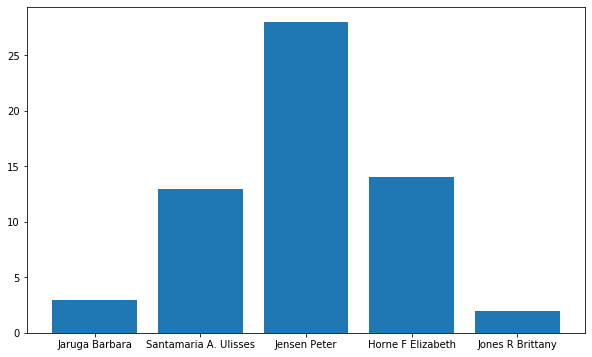

In [4]:
user_frq = []

for i in range(len(user_list.unique())):
    user_frq.append(len(user_list[user_list == user_list.unique()[i]]))

print(user_frq)
plt.subplots(figsize = (10,6))

plt.bar(user_list.unique(), user_frq)
plt.show()

In [5]:
field_list = vp_excel['Field'].unique()

In [6]:
field_list_arr = []

field_list_arr.append(field_list[0])
field_list_arr.append(field_list[2])
field_list_arr.append(field_list[5])
field_list_arr.append(field_list[6])
field_list_arr.append(field_list[9])
field_list_arr.append(field_list[13])
field_list_arr.append(field_list[14])
field_list_arr.append(field_list[15])

field_list_arr

['Field',
 'Cells Per Unit',
 'ExternalPatient/InternalPatient',
 'Volume',
 'Date Frozen',
 'Sample Barcode',
 'Frozen By',
 'Cell Type']

In [7]:
vp_excel_sorted_two = vp_excel.dropna(subset=['Old Value'])

In [8]:
count = 0
vp_index = vp_excel_sorted_two.index.values
vp_excel_sorted_two['Group'] = 0

for i in vp_index:
    
    if vp_excel_sorted_two.at[i, 'status'] == 'DELETE':
        count += 1
    #print(count)
    vp_excel_sorted_two.at[i, 'Group'] = count

C:\Users\jongm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#for i in 

idx = vp_excel_sorted_two[vp_excel_sorted_two['Field'] == field_list_arr[2]].index

#print(idx)
for i in range(len(idx)):
    ind = str(vp_excel_sorted_two['Old Value'][idx].iloc[i])
    fst = ind.rfind('name=')+5
    lst = ind.rfind(';')
        
    ind_new = ind[fst:lst]

    fst = ind.rfind('num=')+4
    lst = len(ind)
    ind[fst:lst]
    
    ind_new = ind_new + ' / ' + ind[fst:lst]
    
    vp_excel_sorted_two.set_value(idx[i], 'Old Value', ind_new)
    
    #print(idx[i])

C:\Users\jongm\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [10]:
group_id = []

for i in vp_index:
    if vp_excel_sorted_two.at[i, 'Old Value'] == user_list.unique()[2]:
        group_id.append(vp_excel_sorted_two.at[i, 'Group'])
        
#group_id

In [11]:
#for i in vp_index:
vp_pete = pd.DataFrame(columns = vp_excel_sorted_two.columns)

for j in group_id:
    vp_pete = vp_pete.append(vp_excel_sorted_two[vp_excel_sorted_two['Group'] == j])
            

In [12]:
#vp_pete

In [13]:
#vp_pete.to_excel('Pete_only.xlsx')

## Alternative way to slice DataFrame

In [ ]:
vp_excel_sorted = vp_excel[vp_excel['Field'] == field_list_arr[0]]

In [ ]:
vp_excel_sorted = pd.DataFrame()

for i in range(len(field_list_arr)):
    #print(i)
    #temp_pd = vp_excel[vp_excel['Field'] == field_list_arr[i]]
    vp_excel_sorted = vp_excel_sorted.append(vp_excel[vp_excel['Field'] == field_list_arr[i]])
    
vp_excel_sorted = vp_excel_sorted.sort_index()